In [10]:
# Customer Segmentation with K-Means Clustering
# PRODIGY_ML_02

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [11]:
# 1. DATA INGESTION & CLEANING
print("="*50)
print("1. DATA INGESTION & CLEANING")
print("="*50)

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nFirst 5 rows:\n{df.head()}")

# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

# Basic statistics
print(f"\nBasic statistics:\n{df.describe()}")

# Encode Gender (Male=0, Female=1)
label_encoder = LabelEncoder()
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])
print(f"\nGender encoding: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# Create a copy for scaling
df_scaled = df.copy()

# Standardize numeric features
scaler = StandardScaler()
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(f"\nFeatures standardized: {features_to_scale}")

1. DATA INGESTION & CLEANING
Dataset shape: (200, 5)

Column names: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Data types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Basic statistics:
       CustomerID         Age 

In [12]:
# 2. FEATURE SCENARIOS
print("\n" + "="*50)
print("2. FEATURE SCENARIOS")
print("="*50)

# Scenario A: 2D - Annual Income vs Spending Score
X_2D = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X_2D_scaled = scaler.fit_transform(X_2D)

# Scenario B: 3D - Annual Income, Spending Score, Age
X_3D = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].values
X_3D_scaled = scaler.fit_transform(X_3D)

# For PCA visualization of 3D data
pca = PCA(n_components=2)
X_3D_pca = pca.fit_transform(X_3D_scaled)

print(f"Scenario A (2D): Annual Income vs Spending Score")
print(f"Scenario B (3D): Annual Income, Spending Score, Age")
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")


2. FEATURE SCENARIOS
Scenario A (2D): Annual Income vs Spending Score
Scenario B (3D): Annual Income, Spending Score, Age
PCA explained variance ratio: [0.44266167 0.33308378]



3. CLUSTER ANALYSIS


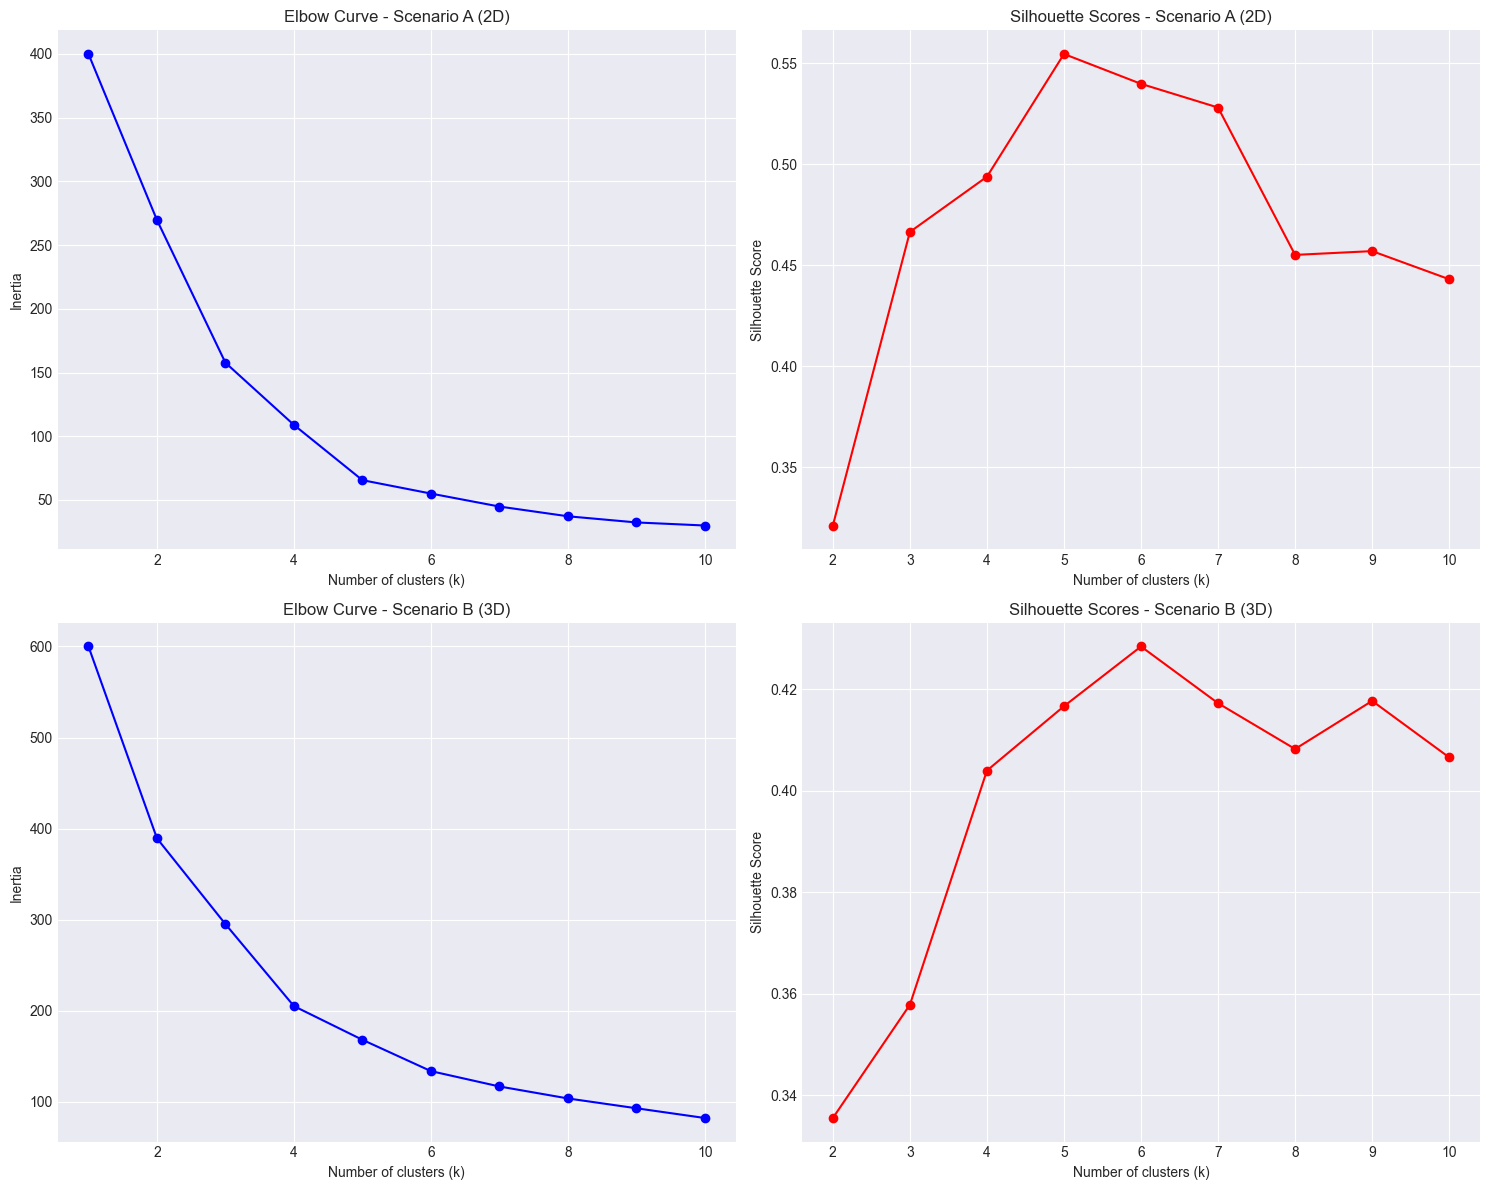

Optimal k for Scenario A (2D): 5
Optimal k for Scenario B (3D): 5

Scenario A (2D) Metrics:
  Silhouette Score: 0.555
  Davies-Bouldin Score: 0.572

Scenario B (3D) Metrics:
  Silhouette Score: 0.417
  Davies-Bouldin Score: 0.875


In [13]:
# 3. CLUSTER ANALYSIS
print("\n" + "="*50)
print("3. CLUSTER ANALYSIS")
print("="*50)

# Function to find optimal k using elbow method and silhouette score
def find_optimal_k(X, k_range):
    inertias = []
    silhouette_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        
        if k > 1:  # Silhouette score requires at least 2 clusters
            score = silhouette_score(X, kmeans.labels_)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(0)
    
    return inertias, silhouette_scores

# Find optimal k for both scenarios
k_range = range(1, 11)

# Scenario A (2D)
inertias_2D, silhouette_scores_2D = find_optimal_k(X_2D_scaled, k_range)

# Scenario B (3D)
inertias_3D, silhouette_scores_3D = find_optimal_k(X_3D_scaled, k_range)

# Plot elbow curves and silhouette scores
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scenario A - Elbow curve
axes[0, 0].plot(k_range, inertias_2D, 'bo-')
axes[0, 0].set_xlabel('Number of clusters (k)')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Elbow Curve - Scenario A (2D)')
axes[0, 0].grid(True)

# Scenario A - Silhouette scores
axes[0, 1].plot(k_range[1:], silhouette_scores_2D[1:], 'ro-')
axes[0, 1].set_xlabel('Number of clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Scores - Scenario A (2D)')
axes[0, 1].grid(True)

# Scenario B - Elbow curve
axes[1, 0].plot(k_range, inertias_3D, 'bo-')
axes[1, 0].set_xlabel('Number of clusters (k)')
axes[1, 0].set_ylabel('Inertia')
axes[1, 0].set_title('Elbow Curve - Scenario B (3D)')
axes[1, 0].grid(True)

# Scenario B - Silhouette scores
axes[1, 1].plot(k_range[1:], silhouette_scores_3D[1:], 'ro-')
axes[1, 1].set_xlabel('Number of clusters (k)')
axes[1, 1].set_ylabel('Silhouette Score')
axes[1, 1].set_title('Silhouette Scores - Scenario B (3D)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.savefig('outputs/optimal_k_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Based on elbow and silhouette analysis, select optimal k
optimal_k_2D = 5  # Based on elbow curve and domain knowledge
optimal_k_3D = 5  # Based on elbow curve and domain knowledge

print(f"Optimal k for Scenario A (2D): {optimal_k_2D}")
print(f"Optimal k for Scenario B (3D): {optimal_k_3D}")

# Fit K-Means models with optimal k
kmeans_2D = KMeans(n_clusters=optimal_k_2D, random_state=42, n_init=10)
kmeans_3D = KMeans(n_clusters=optimal_k_3D, random_state=42, n_init=10)

# Get cluster labels
labels_2D = kmeans_2D.fit_predict(X_2D_scaled)
labels_3D = kmeans_3D.fit_predict(X_3D_scaled)

# Calculate metrics
silhouette_2D = silhouette_score(X_2D_scaled, labels_2D)
davies_bouldin_2D = davies_bouldin_score(X_2D_scaled, labels_2D)

silhouette_3D = silhouette_score(X_3D_scaled, labels_3D)
davies_bouldin_3D = davies_bouldin_score(X_3D_scaled, labels_3D)

print(f"\nScenario A (2D) Metrics:")
print(f"  Silhouette Score: {silhouette_2D:.3f}")
print(f"  Davies-Bouldin Score: {davies_bouldin_2D:.3f}")

print(f"\nScenario B (3D) Metrics:")
print(f"  Silhouette Score: {silhouette_3D:.3f}")
print(f"  Davies-Bouldin Score: {davies_bouldin_3D:.3f}")


4. VISUALIZATION


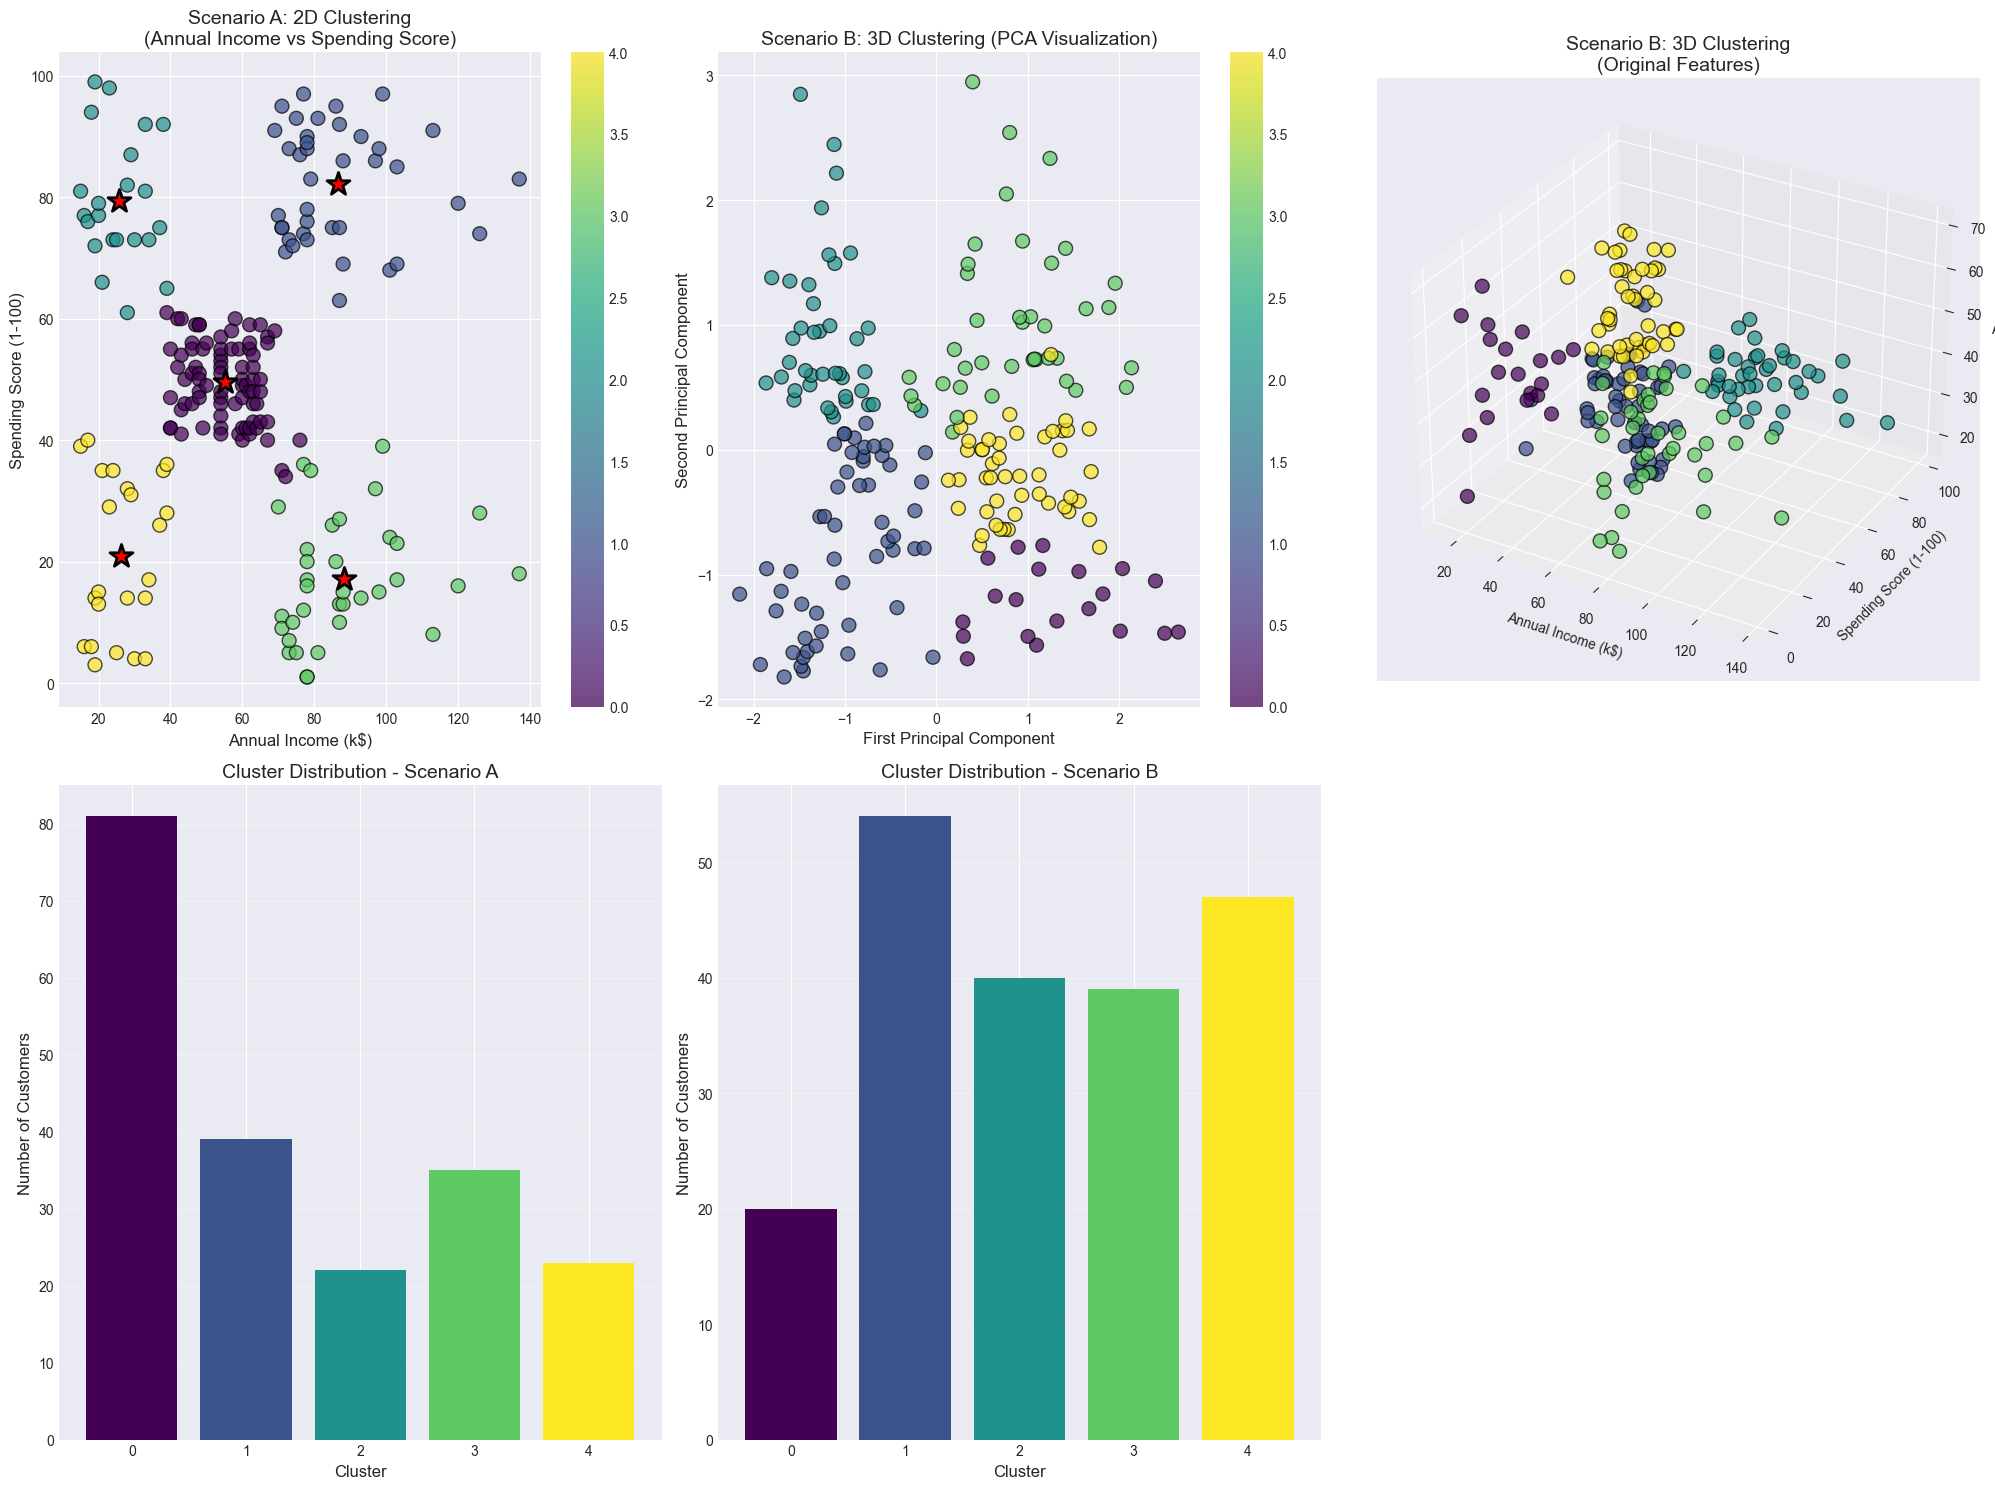

In [14]:
# 4. VISUALIZATION
print("\n" + "="*50)
print("4. VISUALIZATION")
print("="*50)

# Create visualizations
fig = plt.figure(figsize=(20, 15))

# Scenario A - 2D Clustering
ax1 = fig.add_subplot(2, 3, 1)
scatter = ax1.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=labels_2D, cmap='viridis', s=100, alpha=0.7, edgecolors='black')
ax1.scatter(kmeans_2D.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
           kmeans_2D.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
           c='red', s=300, marker='*', edgecolors='black', linewidth=2)
ax1.set_xlabel('Annual Income (k$)', fontsize=12)
ax1.set_ylabel('Spending Score (1-100)', fontsize=12)
ax1.set_title('Scenario A: 2D Clustering\n(Annual Income vs Spending Score)', fontsize=14)
plt.colorbar(scatter, ax=ax1)

# Scenario B - 3D Clustering (using PCA for 2D visualization)
ax2 = fig.add_subplot(2, 3, 2)
scatter = ax2.scatter(X_3D_pca[:, 0], X_3D_pca[:, 1], 
                     c=labels_3D, cmap='viridis', s=100, alpha=0.7, edgecolors='black')
ax2.set_xlabel('First Principal Component', fontsize=12)
ax2.set_ylabel('Second Principal Component', fontsize=12)
ax2.set_title('Scenario B: 3D Clustering (PCA Visualization)', fontsize=14)
plt.colorbar(scatter, ax=ax2)

# 3D visualization for Scenario B
ax3 = fig.add_subplot(2, 3, 3, projection='3d')
scatter = ax3.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'],
                     c=labels_3D, cmap='viridis', s=100, alpha=0.7, edgecolors='black')
ax3.set_xlabel('Annual Income (k$)')
ax3.set_ylabel('Spending Score (1-100)')
ax3.set_zlabel('Age')
ax3.set_title('Scenario B: 3D Clustering\n(Original Features)', fontsize=14)

# Distribution plots for each cluster
ax4 = fig.add_subplot(2, 3, 4)
df['Cluster_2D'] = labels_2D
cluster_sizes_2D = df['Cluster_2D'].value_counts().sort_index()
ax4.bar(cluster_sizes_2D.index, cluster_sizes_2D.values, color=plt.cm.viridis(np.linspace(0, 1, optimal_k_2D)))
ax4.set_xlabel('Cluster', fontsize=12)
ax4.set_ylabel('Number of Customers', fontsize=12)
ax4.set_title('Cluster Distribution - Scenario A', fontsize=14)
ax4.grid(axis='y', alpha=0.3)

ax5 = fig.add_subplot(2, 3, 5)
df['Cluster_3D'] = labels_3D
cluster_sizes_3D = df['Cluster_3D'].value_counts().sort_index()
ax5.bar(cluster_sizes_3D.index, cluster_sizes_3D.values, color=plt.cm.viridis(np.linspace(0, 1, optimal_k_3D)))
ax5.set_xlabel('Cluster', fontsize=12)
ax5.set_ylabel('Number of Customers', fontsize=12)
ax5.set_title('Cluster Distribution - Scenario B', fontsize=14)
ax5.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/clustering_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# 5. CLUSTER PROFILING & BUSINESS INSIGHTS
print("\n" + "="*50)
print("5. CLUSTER PROFILING & BUSINESS INSIGHTS")
print("="*50)

# Analyze clusters for Scenario A (2D)
print("\nSCENARIO A (2D) - CLUSTER PROFILES:")
print("-" * 40)

cluster_profiles_2D = df.groupby('Cluster_2D').agg({
    'Age': ['mean', 'median'],
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median'],
    'Gender': lambda x: x.value_counts().to_dict()
}).round(2)

# Define cluster labels based on characteristics
cluster_labels_2D = {
    0: "Average Income, Average Spenders",
    1: "High Income, High Spenders (Premium Customers)",
    2: "Low Income, Low Spenders (Budget Conscious)",
    3: "Low Income, High Spenders (Young Enthusiasts)",
    4: "High Income, Low Spenders (Careful Spenders)"
}

for cluster in range(optimal_k_2D):
    print(f"\nCluster {cluster}: {cluster_labels_2D.get(cluster, 'Unknown')}")
    print(f"Size: {cluster_sizes_2D[cluster]} customers ({cluster_sizes_2D[cluster]/len(df)*100:.1f}%)")
    
    cluster_data = df[df['Cluster_2D'] == cluster]
    print(f"Age: Mean={cluster_data['Age'].mean():.1f}, Median={cluster_data['Age'].median():.1f}")
    print(f"Annual Income: Mean=${cluster_data['Annual Income (k$)'].mean():.1f}k, Median=${cluster_data['Annual Income (k$)'].median():.1f}k")
    print(f"Spending Score: Mean={cluster_data['Spending Score (1-100)'].mean():.1f}, Median={cluster_data['Spending Score (1-100)'].median():.1f}")
    
    gender_dist = cluster_data['Gender'].value_counts()
    print(f"Gender Distribution: {dict(gender_dist)}")

# Marketing recommendations for each segment
print("\n" + "="*50)
print("MARKETING RECOMMENDATIONS")
print("="*50)

marketing_strategies = {
    0: """
    TARGET: Average Income, Average Spenders
    STRATEGIES:
    - Offer balanced value propositions with mid-range products
    - Create loyalty programs with achievable rewards
    - Focus on seasonal promotions and bundle deals
    - Emphasize quality-to-price ratio in marketing messages
    """,
    
    1: """
    TARGET: High Income, High Spenders (Premium Customers)
    STRATEGIES:
    - Offer VIP experiences and exclusive product lines
    - Create premium membership tiers with luxury benefits
    - Provide personalized shopping experiences and concierge services
    - Focus on quality, exclusivity, and status in marketing
    - Early access to new collections and limited editions
    """,
    
    2: """
    TARGET: Low Income, Low Spenders (Budget Conscious)
    STRATEGIES:
    - Focus on value deals, discounts, and clearance sales
    - Implement a points-based reward system for small purchases
    - Offer budget-friendly product lines and generic brands
    - Promote buy-one-get-one (BOGO) offers
    - Emphasize durability and practicality
    """,
    
    3: """
    TARGET: Low Income, High Spenders (Young Enthusiasts)
    STRATEGIES:
    - Offer flexible payment options (installments, BNPL)
    - Create trendy, affordable fashion lines
    - Use social media influencer marketing
    - Implement gamification in shopping experience
    - Flash sales and limited-time offers to create urgency
    """,
    
    4: """
    TARGET: High Income, Low Spenders (Careful Spenders)
    STRATEGIES:
    - Focus on investment pieces and long-term value
    - Highlight quality, sustainability, and ethical practices
    - Offer extended warranties and quality guarantees
    - Create educational content about product benefits
    - Private sales and member-only discounts
    """
}

for cluster, strategy in marketing_strategies.items():
    print(f"\nCluster {cluster}: {cluster_labels_2D.get(cluster, 'Unknown')}")
    print(strategy)



5. CLUSTER PROFILING & BUSINESS INSIGHTS

SCENARIO A (2D) - CLUSTER PROFILES:
----------------------------------------

Cluster 0: Average Income, Average Spenders
Size: 81 customers (40.5%)
Age: Mean=42.7, Median=46.0
Annual Income: Mean=$55.3k, Median=$54.0k
Spending Score: Mean=49.5, Median=50.0
Gender Distribution: {'Female': 48, 'Male': 33}

Cluster 1: High Income, High Spenders (Premium Customers)
Size: 39 customers (19.5%)
Age: Mean=32.7, Median=32.0
Annual Income: Mean=$86.5k, Median=$79.0k
Spending Score: Mean=82.1, Median=83.0
Gender Distribution: {'Female': 21, 'Male': 18}

Cluster 2: Low Income, Low Spenders (Budget Conscious)
Size: 22 customers (11.0%)
Age: Mean=25.3, Median=23.5
Annual Income: Mean=$25.7k, Median=$24.5k
Spending Score: Mean=79.4, Median=77.0
Gender Distribution: {'Female': 13, 'Male': 9}

Cluster 3: Low Income, High Spenders (Young Enthusiasts)
Size: 35 customers (17.5%)
Age: Mean=41.1, Median=42.0
Annual Income: Mean=$88.2k, Median=$85.0k
Spending Score


6. BONUS: ALTERNATIVE CLUSTERING METHODS
Best DBSCAN parameters: {}
DBSCAN Silhouette Score: -1.000

Agglomerative Clustering Metrics:
  Silhouette Score: 0.554
  Davies-Bouldin Score: 0.578


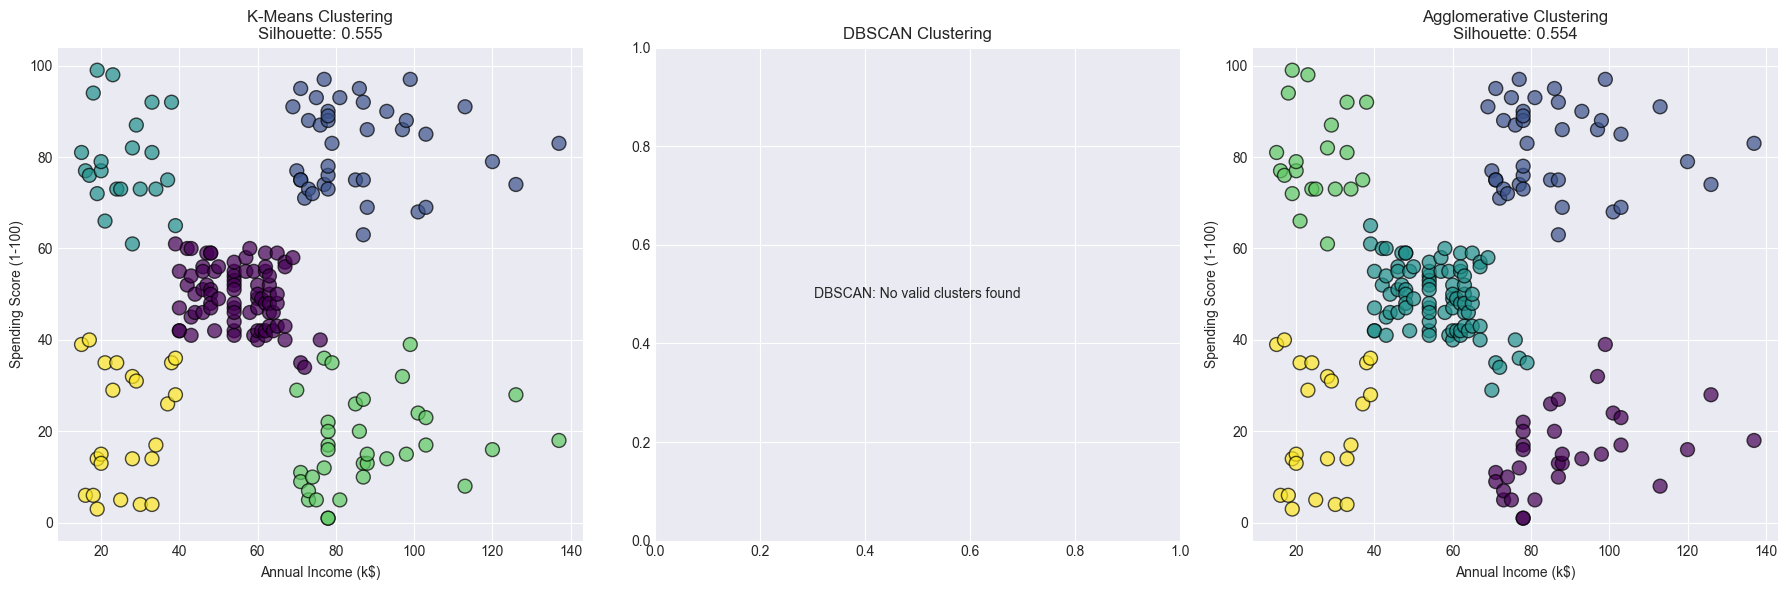

In [16]:
# 6. BONUS COMPARISON - Alternative Clustering Methods
print("\n" + "="*50)
print("6. BONUS: ALTERNATIVE CLUSTERING METHODS")
print("="*50)

# DBSCAN Clustering
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10]

best_dbscan_score = -1
best_dbscan_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_2D_scaled)
        
        # Check if DBSCAN found valid clusters
        if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:
            score = silhouette_score(X_2D_scaled, dbscan_labels)
            if score > best_dbscan_score:
                best_dbscan_score = score
                best_dbscan_params = {'eps': eps, 'min_samples': min_samples}
                best_dbscan_labels = dbscan_labels

print(f"Best DBSCAN parameters: {best_dbscan_params}")
print(f"DBSCAN Silhouette Score: {best_dbscan_score:.3f}")

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k_2D, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_2D_scaled)
agg_silhouette = silhouette_score(X_2D_scaled, agg_labels)
agg_davies_bouldin = davies_bouldin_score(X_2D_scaled, agg_labels)

print(f"\nAgglomerative Clustering Metrics:")
print(f"  Silhouette Score: {agg_silhouette:.3f}")
print(f"  Davies-Bouldin Score: {agg_davies_bouldin:.3f}")

# Comparison visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# K-Means
axes[0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                c=labels_2D, cmap='viridis', s=100, alpha=0.7, edgecolors='black')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].set_title(f'K-Means Clustering\nSilhouette: {silhouette_2D:.3f}')

# DBSCAN
if best_dbscan_score > -1:
    axes[1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                    c=best_dbscan_labels, cmap='viridis', s=100, alpha=0.7, edgecolors='black')
    axes[1].set_xlabel('Annual Income (k$)')
    axes[1].set_ylabel('Spending Score (1-100)')
    axes[1].set_title(f'DBSCAN Clustering\nSilhouette: {best_dbscan_score:.3f}')
else:
    axes[1].text(0.5, 0.5, 'DBSCAN: No valid clusters found', 
                 ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('DBSCAN Clustering')

# Agglomerative
axes[2].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                c=agg_labels, cmap='viridis', s=100, alpha=0.7, edgecolors='black')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')
axes[2].set_title(f'Agglomerative Clustering\nSilhouette: {agg_silhouette:.3f}')

plt.tight_layout()
plt.savefig('outputs/clustering_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Summary comparison
print("\n" + "="*50)
print("CLUSTERING METHODS COMPARISON")
print("="*50)

comparison_df = pd.DataFrame({
    'Method': ['K-Means', 'DBSCAN', 'Agglomerative'],
    'Silhouette Score': [silhouette_2D, best_dbscan_score if best_dbscan_score > -1 else 'N/A', agg_silhouette],
    'Davies-Bouldin Score': [davies_bouldin_2D, 'N/A', agg_davies_bouldin],
    'Advantages': [
        'Fast, scalable, works well with spherical clusters',
        'Finds arbitrary shaped clusters, handles noise',
        'No need to specify k beforehand, hierarchical structure'
    ],
    'Disadvantages': [
        'Assumes spherical clusters, sensitive to initialization',
        'Sensitive to parameters, may not find all clusters',
        'Computationally expensive for large datasets'
    ]
})

print(comparison_df.to_string(index=False))

# Save the preprocessed data with cluster labels
df.to_csv('outputs/mall_customers_clustered.csv', index=False)
print("\n✓ Clustered data saved to 'mall_customers_clustered.csv'")

print("\n" + "="*50)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*50)


CLUSTERING METHODS COMPARISON
       Method Silhouette Score Davies-Bouldin Score                                              Advantages                                           Disadvantages
      K-Means         0.554657             0.572236      Fast, scalable, works well with spherical clusters Assumes spherical clusters, sensitive to initialization
       DBSCAN              N/A                  N/A          Finds arbitrary shaped clusters, handles noise      Sensitive to parameters, may not find all clusters
Agglomerative         0.553809             0.577862 No need to specify k beforehand, hierarchical structure            Computationally expensive for large datasets

✓ Clustered data saved to 'mall_customers_clustered.csv'

PROJECT COMPLETED SUCCESSFULLY!
